# Project 3. Clustering and Manifold Learning

### Student ID: 915030521
### Student Name: Chenghan Sun

In [1]:
# Note: Do not change anything

import numpy as np
from numpy import genfromtxt
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import imread

import os


%matplotlib inline

## Part 1. Image segmentation using $k$-means

Perform a segmentation analysis on the following photo. The data folder includes data.png (credit to WYM) along with $48$ feature files (and recall that the image itself has color information). Each feature contains certain information extracted from the image. The type of information (the features) extracted is different in every file. 

Provide two segmentation plots by using appropriate subsets of the features. At least one of them should identify all the pixels belonging to the face region, and the other one is up to you to choose. However, **you need explain your rational** (why did you use specific features etc.)

Hint: Carefully choose the features. To make an informed choice of features, use imshow to plot each feature to understand what features are extracted.

In [24]:
# import pkgs for Part 1
from sklearn.cluster import KMeans
plt.style.use('ggplot')

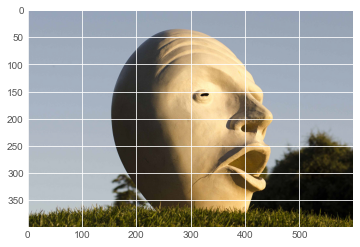

In [49]:
# load image
image = imread(os.getcwd()+'/data/data.png')
plt.imshow(image)

In [35]:
# load features
def load_all_features(feature_path):
    arr = os.listdir(feature_path)
    feature_data_list = []
    for idx in range(len(arr)):
        each_path = feature_path + str(arr[idx])
        feature_data = pd.read_csv(each_path, header=None)
        feature_data_list.append(feature_data)
    return feature_data_list

In [36]:
feature_data_list = load_all_features('./data/features/')

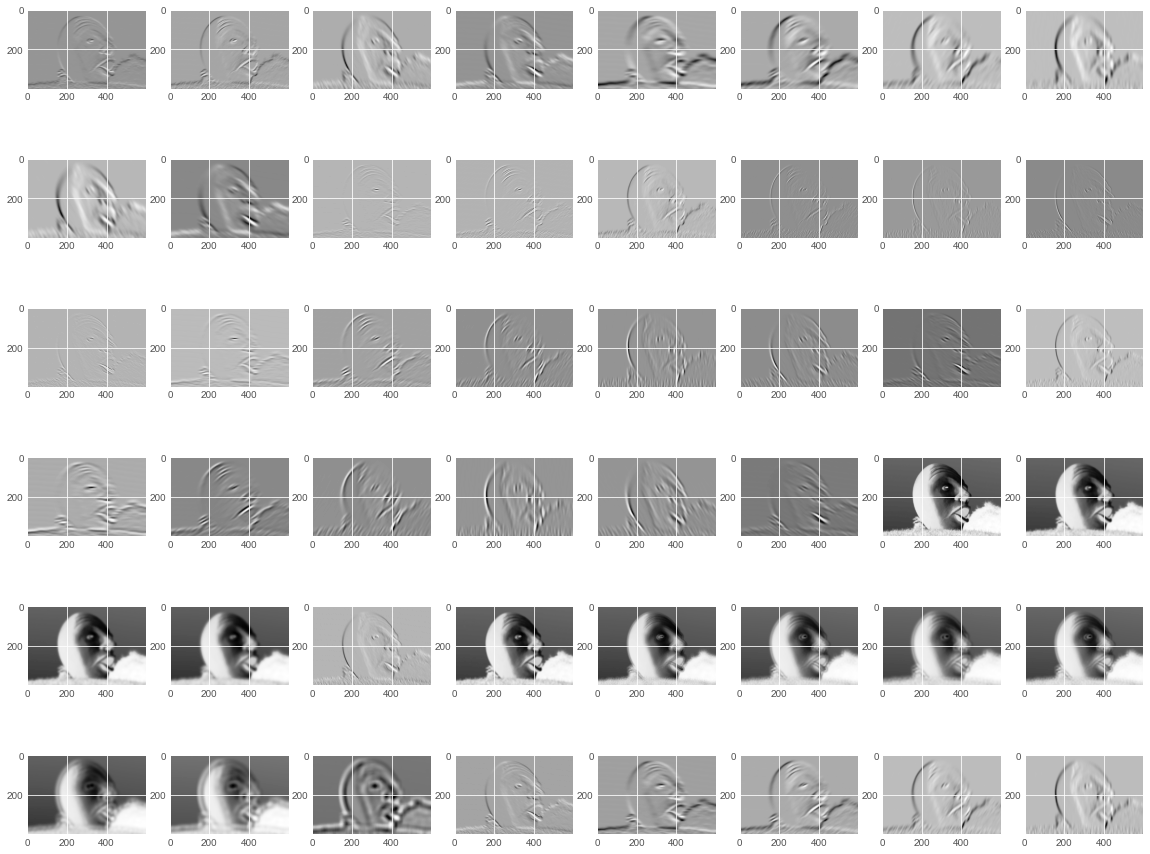

In [48]:
plt.figure(figsize=(20,16))
for i in range(len(feature_data_list)):
    plt.subplot(6, 8, i+1)
    plt.imshow(feature_data_list[i])

In [74]:
# from the plots above, I choose 3 features: 31 - 33
sel_fea_1 = np.array(feature_data_list[30])
sel_fea_1 = sel_fea_1.reshape(-1, )
sel_fea_2 = np.array(feature_data_list[31])
sel_fea_2 = sel_fea_2.reshape(-1, )
sel_fea_3 = np.array(feature_data_list[32])
sel_fea_3 = sel_fea_3.reshape(-1, )
d = {'fea1': sel_fea_1, 'fea2': sel_fea_2, 'fea3': sel_fea_3}
re_feature = pd.DataFrame(data=d)

In [99]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.fit(re_feature)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

In [98]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

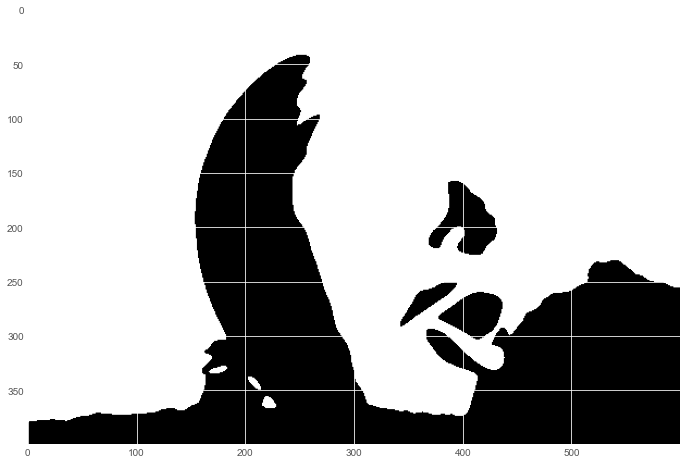

In [100]:
plt.figure(figsize = (15, 8))
plt.imshow(cluster_labels.reshape(400, 600))

## Part 2. mean-shift path

Plot the mean shift path for the attached dataset mean_shift.csv.

In [116]:
ms_data = pd.read_csv('./data/mean_shift.csv', header=None)
print(ms_data.shape)
ms_data = np.array(ms_data)
source1 = np.ones(60,int)
source2 = np.ones(60,int)*2
source3 = np.ones(60,int)*3
source = np.concatenate((source1,source2,source3))
source.shape

(180, 2)


(180,)

KeyboardInterrupt: 

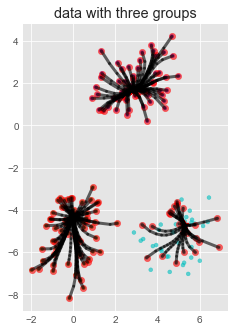

In [124]:
from IPython import display

def psi(x,tuning):
    temp = np.exp(-tuning*np.sum(np.square(x)))
    return(temp)

# Calculate sum of weights

def weights_sum(old_point,tuning,neighbors):
    Temp = 0
    for row in neighbors: 
        Temp += psi(np.array(old_point) - row,tuning)
    return(Temp)

def new_point(old_point,tuning,neighbors):
    z = np.array([0,0])
    w = 0
    sum_ = weights_sum(old_point,tuning,neighbors)
    for row in neighbors:
        w = psi(np.array(old_point) - row,tuning) / sum_ 
        z = z + w*np.array(row)
        #print(w)
    return(z)

bandwidth = 1
tuning = 1/bandwidth**2

fig = plt.figure()
ax=fig.add_axes([0,0,1,1], title = 'data with three groups')
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(ms_data[:,0], ms_data[:,1], c = source, \
           cmap = colors.ListedColormap(['g','black','b','m', 'c']),alpha=0.6, s = 15)

for i in range(180):
    converge = False

    old_pt = ms_data[i,:]
    ax.scatter(old_pt[0], old_pt[1],color = 'red' , marker = 'o', s = 40,alpha=0.6)
    while not converge:
        new_pt = new_point(old_pt, tuning, ms_data)
        ax.plot([old_pt[0],new_pt[0]], [old_pt[1],new_pt[1]],color = 'black',linewidth = 3, alpha=0.6)
        converge = np.sum(np.square(old_pt - new_pt)) < 0.0001
        display.clear_output(wait = True)
        display.display(plt.gcf())
        old_pt = new_pt
    display.clear_output(wait=True)
    ax.scatter(old_pt[0], old_pt[1], color = 'red', marker = '*', s = 70,alpha=0.6)


## Part 3. Comparing different clustering methods

Perform clustering task on the dataset comparing_cluster_methods.csv. Use DBSCAN, k-means and mean shift. Plot and compare the results. Find the methods that are able to seperate the three clusters (of course one needs to find a good tuning parameter by trial-and-error to get the perfect result), and explain why they are able to do so and why the remaining methods are not able to.

## Part 4. Shape learning

Use any method to recover the shape of datasets 1~5. Provide the methods and describe the shape by both plots and words. The difficulty is ranked in order. We do not expect you to solve all the problems. 

Hint: for 3d plots, one can also plot it in python (outside the jupyter notebook environment) in order to change the viewing angles to have a better visual impression.

Hint: MDS and locally linear embedding are the ways to go for higher dimension data.

Dataset 1.

Dataset 2.

Dataset 3.

Dataset 4.

Dataset 5.

## Part 5. Multi-dimensional Scaling and PCA

This is a continuation problem of the part 5 in project 2. Use Multi-dimensional Scaling to plot the points in data2 and label your clusters by different colors (set k=7 in k-means). Use PCA to do the same thing.

# <font color="blue"> Submit your notebook and a pdf version of it on canvas.</font>